In [2]:
import pandas as pd 
import numpy as np

## 1. Carga fichero.

In [3]:
df = pd.read_csv("../Data/train.csv")
df.head()

,work_year,salario_eur,experience_level,employment_type_encoded,job_title_map,company_location,employee_residence,company_size,remote_ratio
0,2022,33831.16,3,2,3,35,40,1,0
1,2023,139656.00,2,2,1,3,4,1,100
2,2022,92000.00,3,2,3,3,4,1,0
3,2022,144072.00,3,2,3,3,4,1,100
4,2023,161000.00,3,2,3,3,4,1,100


In [4]:
df.describe()

,work_year,salario_eur,experience_level,employment_type_encoded,job_title_map,company_location,employee_residence,company_size,remote_ratio
count,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000
mean,2022.367177,127011.510200,2.646138,1.995672,2.212383,7.553262,9.668442,1.083888,46.970706
std,0.691994,58054.043449,0.676627,0.142458,1.291961,11.873606,13.882166,0.390897,48.632424
min,2020.000000,4721.440000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,2022.000000,87400.000000,2.000000,2.000000,1.000000,3.000000,4.000000,1.000000,0.000000
50%,2022.000000,124200.000000,3.000000,2.000000,3.000000,3.000000,4.000000,1.000000,0.000000
75%,2023.000000,162150.000000,3.000000,2.000000,3.000000,3.000000,4.000000,1.000000,100.000000
max,2023.000000,414000.000000,4.000000,3.000000,5.000000,72.000000,78.000000,2.000000,100.000000


## 2. Creacion X/Y.

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df.drop(columns=["salario_eur"], axis=1)
y = df["salario_eur"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(600, 8)
(2404, 8)
(600,)
(2404,)


In [8]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [21]:
# Creo el scaler con los datos de train
scal = StandardScaler() # Declaro el scaler
scal.fit(X_train) 
X_train_scal = scal.transform(X_train) # Aplico el scaler 
X_test_scal = scal.transform(X_test)

#Reverse
#X_train = scal.inverse_transform(X_train)


###  1º Regresión lineal.

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
linear_model = LinearRegression()
linear_model.fit(X_train_scal, y_train)

LinearRegression()

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, r2_score

In [13]:
def valoracion_modelos(tipo, modelo, Xtest, ytest):

    y_pred = modelo.predict(Xtest)
    print("RF_scoore", r2_score(ytest , y_pred))
    print("MAE", tipo, mean_absolute_error(ytest, y_pred))
    print("MSE",tipo, mean_squared_error(ytest, y_pred))


In [14]:
valoracion_modelos("linear_model",linear_model, X_test, y_test )

RF_scoore -28874.528654948135
MAE linear_model 9931968.52194605
MSE linear_model 98718181680812.83


c:\Users\Usuario\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


#### 2. Polynomial Regression

In [15]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=3)
poly_reg.fit(X_train)
X_train_poly = poly_reg.transform(X_train)
X_test_poly = poly_reg.transform(X_test)

pol_reg_2 = LinearRegression()
pol_reg_2.fit(X_train_poly, y_train)

LinearRegression()

In [16]:
valoracion_modelos("polynomial",pol_reg_2, X_test_poly, y_test )

RF_scoore -10696613916437.605
MAE polynomial 15558563751.586884
MSE polynomial 3.6569037006757918e+22


Mejora el resultado pero sigue dando margen a mejora.

#### 3. Random Forest Regressor

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

model = RandomForestRegressor(random_state=0)

parameters = {"max_depth":[2,3,4,5,6,7],
              "criterion": ['squared_error', 'absolute_error'],
              "min_samples_split": [2, 5, 10],
              "min_samples_leaf": [1, 2, 4],
              "max_features": [3,4,5,6]
}

dtr_gs = GridSearchCV(model, parameters, cv=5, scoring="neg_mean_absolute_error", n_jobs= -1)

In [22]:
dtr_gs.fit(X_train_scal, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [2, 3, 4, 5, 6, 7],
                         'max_features': [3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_absolute_error')

In [23]:
dtr_gs.best_params_

{'criterion': 'absolute_error',
 'max_depth': 6,
 'max_features': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 5}

In [24]:
valoracion_modelos("randomforest",dtr_gs, X_test_scal, y_test )

RF_scoore 0.35047648700282397
MAE randomforest 34166.62927454243
MSE randomforest 2220557792.3169


### 4. XGRB modelo


In [25]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.preprocessing import OrdinalEncoder

In [26]:
model_xgb = XGBRegressor(
    objective="reg:squarederror",
    n_estimators=10_000,
    max_depth=7,
    learning_rate=0.1,
)

In [34]:
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=10000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

In [35]:
valoracion_modelos("model_xgb",model_xgb, X_test, y_test )
#la valoracion del modelo usando x scalada daba mucho peor

RF_scoore 0.32060631107038495
MAE model_xgb 35473.12087838628
MSE model_xgb 2322676423.278521


### 5. Pipeline

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


In [31]:

# Definir los pasos del pipeline
steps = [
    ('scaler', StandardScaler()),  # Escalado de datos
    ('model', None)  # Modelo a evaluar (se especificará posteriormente)
]

# Crear el pipeline
pipeline = Pipeline(steps)

# Definir los hiperparámetros a ajustar para cada modelo
parameters = [
    {
        'model': [LinearRegression()]  # Regresión lineal
    },
    {
        'model': [RandomForestRegressor()],  # RandomForestRegressor
        'model__n_estimators': [10, 50, 100],  # Número de árboles en el bosque
        'model__max_depth': [None, 5, 10],  # Profundidad máxima de los árboles
    },
    {
        'model': [XGBRegressor()],  # XGBRegressor
        'model__n_estimators': [10, 50, 100],  # Número de estimadores (árboles)
        'model__max_depth': [3, 6, 9],  # Profundidad máxima de los árboles
        'model__learning_rate': [0.1, 0.01, 0.001],  # Tasa de aprendizaje
    }
]

# Realizar la búsqueda de hiperparámetros y seleccionar el mejor modelo
grid_search = GridSearchCV(pipeline, parameters, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)  # X_train y y_train son tus datos de entrenamiento



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', None)]),
             param_grid=[{'model': [LinearRegression()]},
                         {'model': [RandomForestRegressor()],
                          'model__max_depth': [None, 5, 10],
                          'model__n_estimators': [10, 50, 100]},
                         {'model': [XGBRegressor(base_score=None, booster=None,
                                                 callbacks=None,
                                                 colsample_bylevel=None,
                                                 colsample_bynode=None,
                                                 colsa...
                                                 max_delta_step=None,
                                                 max_depth=3, max_leaves=None,
                                                 min_child_weight=None,
                                       

In [32]:
# Obtener el mejor modelo y sus hiperparámetros
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_


In [33]:
valoracion_modelos("pipeline",best_model, X_test, y_test )

RF_scoore 0.3742762808418403
MAE pipeline 34132.12454520379
MSE pipeline 2139192273.4292207


In [36]:
import pickle

with open('../models/train_model.pkl', 'wb') as archivo_salida:
    pickle.dump(best_model, archivo_salida)

### 6. PCA- no supervisado

In [77]:
from sklearn.decomposition import PCA
from scipy import stats

In [10]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
X_scaled.shape

(3004, 8)

In [78]:
pca = PCA(n_components=8)
X_pca = pca.fit_transform(X_scaled)


In [79]:
import matplotlib.pyplot as plt

In [80]:
pca.explained_variance_ratio_.cumsum()

array([0.30481036, 0.44822216, 0.57649485, 0.69939132, 0.81576539,
       0.90607408, 0.99140761, 1.        ])

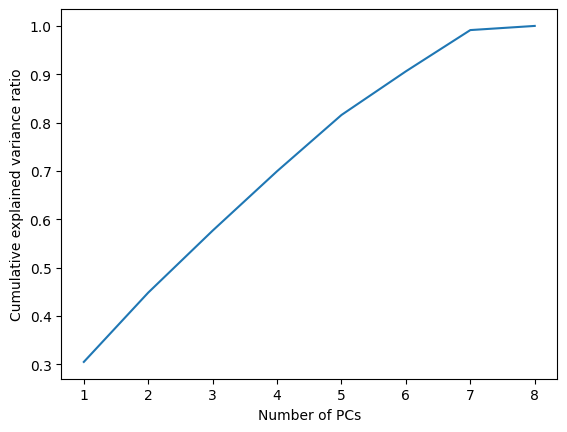

In [81]:
plt.plot(pd.Series(pca.explained_variance_ratio_.cumsum(), index=np.arange(1,9)))
plt.xlabel('Number of PCs')
plt.ylabel("Cumulative explained variance ratio");

In [82]:
pd.DataFrame(pca.components_[:8], columns=X.columns, index=['PC1','PC2','PC3','PC4','PC5', 'PC6','PC7','PC8'])

,work_year,experience_level_mean,employment_type_encoded,job_title_mean,company_location_mean,employee_location_mean,company_size,remote_ratio
PC1,0.336822,0.379444,-0.013862,0.210291,0.573298,0.581133,-0.118406,-0.133237
PC2,-0.473366,0.192252,-0.246535,0.240997,0.151820,0.133381,0.363991,0.668413
PC3,0.032875,-0.012259,-0.684783,-0.266695,0.007604,-0.018152,-0.639982,0.220796
PC4,0.130757,0.174755,-0.463749,0.699983,-0.267021,-0.245241,0.099335,-0.325597
PC5,0.025769,-0.297373,-0.503665,-0.377215,0.166574,0.180860,0.583495,-0.337657
PC6,0.468256,0.639273,-0.036729,-0.378285,-0.242099,-0.207353,0.284839,0.211844
PC7,-0.650967,0.539555,-0.001896,-0.226278,-0.007957,-0.015559,-0.109518,-0.470763
PC8,0.024736,0.012322,0.002489,0.001773,0.700357,-0.712793,0.021281,-0.014176


In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline


In [89]:
pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=5)),
    ('classifier', RandomForestRegressor())
])
pipe

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=5)),
                ('classifier', RandomForestRegressor())])

In [93]:
params= {
    'scaler': [StandardScaler(), None],
    'pca__n_components': [5,6,7],
    'classifier__max_depth': np.arange(3,7),
    'classifier__min_samples_leaf': [2,3,4]
}

gs = GridSearchCV(pipe, params, cv=5, scoring='neg_mean_absolute_error')

In [94]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA(n_components=5)),
                                       ('classifier',
                                        RandomForestRegressor())]),
             param_grid={'classifier__max_depth': array([3, 4, 5, 6]),
                         'classifier__min_samples_leaf': [2, 3, 4],
                         'pca__n_components': [5, 6, 7],
                         'scaler': [StandardScaler(), None]},
             scoring='neg_mean_absolute_error')

In [95]:
valoracion_modelos("pca_randomforest",gs, X_test, y_test )

RF_scoore 0.3946492169479565
MAE pca_randomforest 33345.78133688359
MSE pca_randomforest 2069542320.6291175
